# Business Understanding

Airbnb is an online platform that connects travellers looking for accommodation to hosts of spaces available for rent.
Airbnb is an American vacation rental online marketplace company based in San Francisco, California. Airbnb maintains and hosts 
a marketplace, accessible to consumers on its website or app. Users can arrange lodging, primarily homestays, and tourism 
experiences or list their spare rooms, properties, or part of it for rental. On the other hand, users who are traveling are 
looking for stays search properties and rooms by neighborhood or location. Airbnb recommends the best price in the neighborhood 
and users book the best deal.

In this analysis, we will be using Boston Airbnb data. To analyse the customer reviews and understand customer satisfaction
as well as any additional insights from the rewiew. This will allow us to understand customer preferences, and provide what
customers want. In order to do so, we will be answering the following questions:
    
1. What type of properties are being booked the most?
2. Is there a relation between the number of bookings of a place and the reviews score?
3. Is there anything that bias the reviews of the users?
4. How reviews for a given property changes through seasons?

# Data Understanding

In the selected dataset, we have 3 data file:
    - listings
    - reviews
    - calendar
We will go through the data in the below analyis to understand them better and use the appropriete one or ones for the rest of
our analysis.

In [1]:
#Import the necessary packages

import numpy as np
import pandas as pd
#import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import cartopy

%matplotlib inline
#mpl.style.use('ggplot')

## Reading the 3 files into dataframes

In [2]:
listings = pd.read_csv("data/listings.csv")
calendar = pd.read_csv("data/calendar.csv")
reviews = pd.read_csv("data/reviews.csv")

## Analysis and data preparation for the 3 files we have

### Lintings data

In [3]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
listings.shape

(3585, 95)

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [6]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


### Dealing with null values in the listings data

In [7]:
#list of column with more than 70% null value

to_drop = [cols for cols in listings.columns.values if (listings[cols].isnull().sum()/len(listings)*100)>=70]

In [8]:
#check the result
to_drop

['neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'has_availability',
 'license',
 'jurisdiction_names']

We will drop thos colums with more than 70% null values as they are not usefull for our analysis
The weekly_price and monthly_price can also be removed as we have the price column which is enough for our needs.

In [9]:
#Drop columns with more than 70% null value
listings.drop(to_drop,axis=1,inplace=True)

In [10]:
#cehck if all columns with more than 70% null value has been removed
[cols for cols in listings.columns.values if (listings[cols].isnull().sum()/len(listings)*100)>=70]

[]

Now we are dealing with the price colums.

In [11]:
# List of all columns with price
listings_price = listings[[x for x in listings.columns if 'price' in x]]

In [12]:
listings_price.head()

,price
0,$250.00
1,$65.00
2,$65.00
3,$75.00
4,$79.00


Let's change the type of the price column to string and remove the dollar($)sign

In [13]:
# change the type of the price column and remove the $ sign
listings.price = listings.price.str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\Dilimou\AppData\Local\Temp/ipykernel_23132/2994240623.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings.price = listings.price.str.replace('$', '').str.replace(',', '').astype(float)


In [14]:
#check the changes
listings.price.head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

As our main focus on this analysis is the reviews, let's isolates all columns with reviews and see if we need to so any chansges

In [15]:
#list of columns related to reviews
listings_reviews = listings[[x for x in listings.columns if 'review' in x]]

In [16]:
listings_reviews.describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,2829.000000
mean,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.970908
std,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,2.120561
min,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.480000
50%,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
75%,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.720000
max,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


In [17]:
listings_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            3585 non-null   int64  
 1   first_review                 2829 non-null   object 
 2   last_review                  2829 non-null   object 
 3   review_scores_rating         2772 non-null   float64
 4   review_scores_accuracy       2762 non-null   float64
 5   review_scores_cleanliness    2767 non-null   float64
 6   review_scores_checkin        2765 non-null   float64
 7   review_scores_communication  2767 non-null   float64
 8   review_scores_location       2763 non-null   float64
 9   review_scores_value          2764 non-null   float64
 10  reviews_per_month            2829 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 308.2+ KB


In [18]:
listings_reviews.head()

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1.30
2,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.47
3,1,2016-08-28,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
4,29,2015-08-18,2016-09-01,99.0,10.0,10.0,10.0,10.0,9.0,10.0,2.25


In the listings_reviews we do have some rows with number of reviews equal zero(0). Those rows are not so usefull for our analysis. Therefore we will drop them.

In [19]:
# Grouping all rows without reviews
to_drop1 = listings_reviews[listings_reviews['number_of_reviews'] == 0]

In [20]:
to_drop1

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3577,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3579,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3581,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3582,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# drop all rows without reviews
listings.drop(to_drop1.index, inplace = True)

Now, we will check if we have any other null reviews values.

In [22]:
listings_reviews1 = listings[[x for x in listings.columns if 'review' in x]]

In [23]:
(listings_reviews1.isnull().sum()/len(listings_reviews1)*100).sort_values(ascending=False)

review_scores_accuracy         2.368328
review_scores_location         2.332980
review_scores_value            2.297632
review_scores_checkin          2.262283
review_scores_cleanliness      2.191587
review_scores_communication    2.191587
review_scores_rating           2.014846
number_of_reviews              0.000000
first_review                   0.000000
last_review                    0.000000
reviews_per_month              0.000000
dtype: float64

We still have some columns with null values. We will not drop those as they might be usefull to our analysis. 
We will fill those rows with the mean.
We will be using the mean because in the listings_reviews.describe() we did few cells earlier. The smallest values in all those table where greater than 0. 
It will be more usefull to fill them with the mean.

In [24]:
# grouping all remaining reviews columns with null values
tobe_filled = [cols for cols in listings_reviews1.columns.values if (listings_reviews1[cols].isnull().sum()/len(listings_reviews1)*100)>=2]

In [25]:
tobe_filled

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [26]:
# Fill the null vlaues with the mean
listings[tobe_filled] = listings[tobe_filled].fillna(value=round(listings[tobe_filled].mean()))

### Let's analyse the calendar data we have

In [27]:
#Analyse and prepare the calendar data

In [28]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [29]:
calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [30]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


The calendar data does not contain usefull information to our analysis. We will not comtinue ivestigating it further.

### Analysing the revilews data

In [31]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [32]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [33]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [34]:
# We need to change the date column to a datetime 
reviews['date'] = pd.to_datetime(reviews.date) 

In [35]:
# Let's add month and year and yearmonth column to the reviews dataset for easy plotting
reviews['month'], reviews['year'], reviews['yearmonth'] = reviews.date.dt.month, reviews.date.dt.year, reviews.date.dt.to_period("M")
reviews.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   id             68275 non-null  int64         
 2   date           68275 non-null  datetime64[ns]
 3   reviewer_id    68275 non-null  int64         
 4   reviewer_name  68275 non-null  object        
 5   comments       68222 non-null  object        
 6   month          68275 non-null  int64         
 7   year           68275 non-null  int64         
 8   yearmonth      68275 non-null  period[M]     
dtypes: datetime64[ns](1), int64(5), object(2), period[M](1)
memory usage: 4.7+ MB


C:\Users\Dilimou\AppData\Local\Temp/ipykernel_23132/233922710.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  reviews.info(verbose=True, null_counts=True)


In [36]:
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,month,year,yearmonth
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,5,2013,2013-05
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,5,2013,2013-05
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,6,2013,2013-06
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,6,2013,2013-06
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,6,2013,2013-06
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...,6,2013,2013-06
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...,8,2013,2013-08
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h...",8,2013,2013-08
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a...",9,2013,2013-09
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...,10,2013,2013-10


In [37]:
# Now, we will check for missing values in the reviews data

(reviews.isnull().sum()/len(reviews)*100).sort_values(ascending=False)

comments         0.077627
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
month            0.000000
year             0.000000
yearmonth        0.000000
dtype: float64

We do not have much null values. The few null values lies in the comments row which is not usesd in our analysis. We do not have more prosessing to do with the reviews data.

# Now we will start our analysis on the data

Let's begin by listing the type of property that are the most listed.

Text(0, 0.5, 'Number of listings')

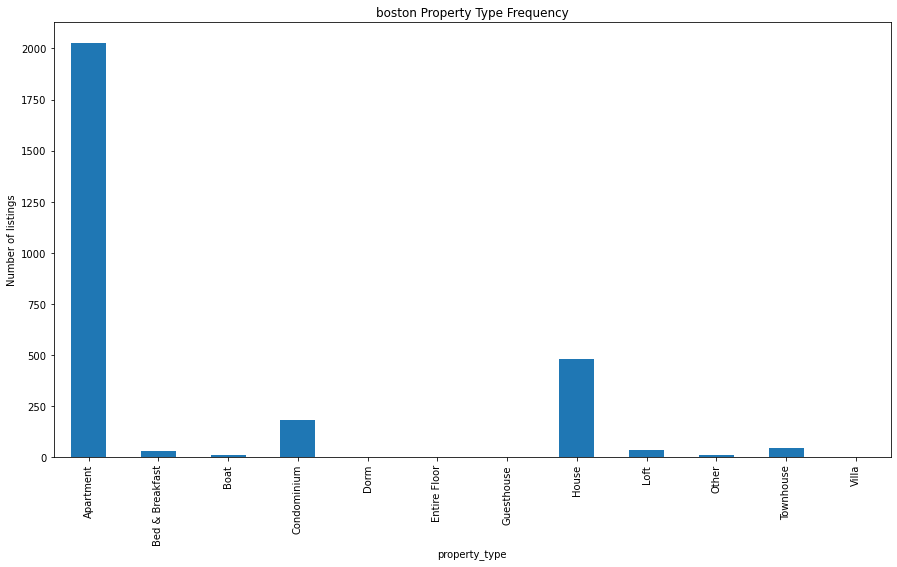

In [38]:
#Analyzing and plotting the number of listings based on their property type

propertytype = listings[['host_listings_count', 'property_type']].sort_values(by = 'host_listings_count', ascending=True)

propertytype.groupby(['property_type'])['host_listings_count'].count().plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           figsize =(15,8), 
           title = 'boston Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

The most listed places we have in the dataset are in these order: Appartment, House, condominium.

### Analysing the relationship between price and number of reviews

Text(0, 0.5, 'Number of reviews')

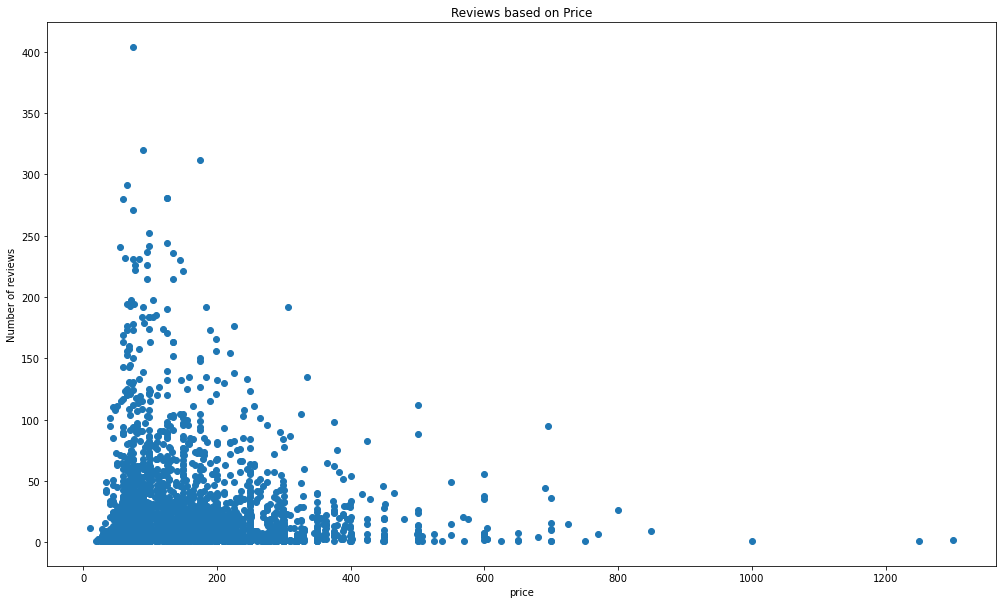

In [39]:
#Interpreting the relation between number of reviews and price

price_review = listings[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

From the graph, the reviews were most observed for the listings that have a price range around 100 - 400. The number quickly declines as the price goes up.
Let's plot the data between the price range <=100 and see if we can have a clearer interpretation.

Text(0, 0.5, 'Number of reviews')

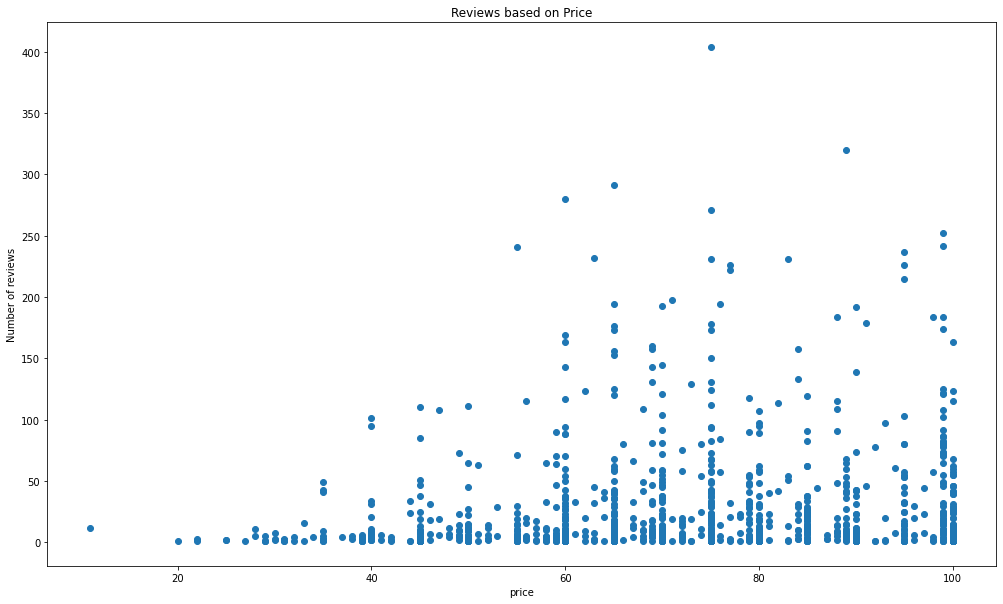

In [40]:
#Interpreting the relation between number of reviews and price

price_review = listings[['number_of_reviews', 'price']].sort_values(by = 'price')
price_review1 = price_review[price_review['price'] <= 100]

price_review1.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

We can see that for a particular price the number of reviews is quite ransom, thus it is not showing any relationshitp between the price and the number a reviews.
Lets group the data by price in order to have a better view of the accumulated number of reviews for a given price.

Text(0, 0.5, 'Number of reviews')

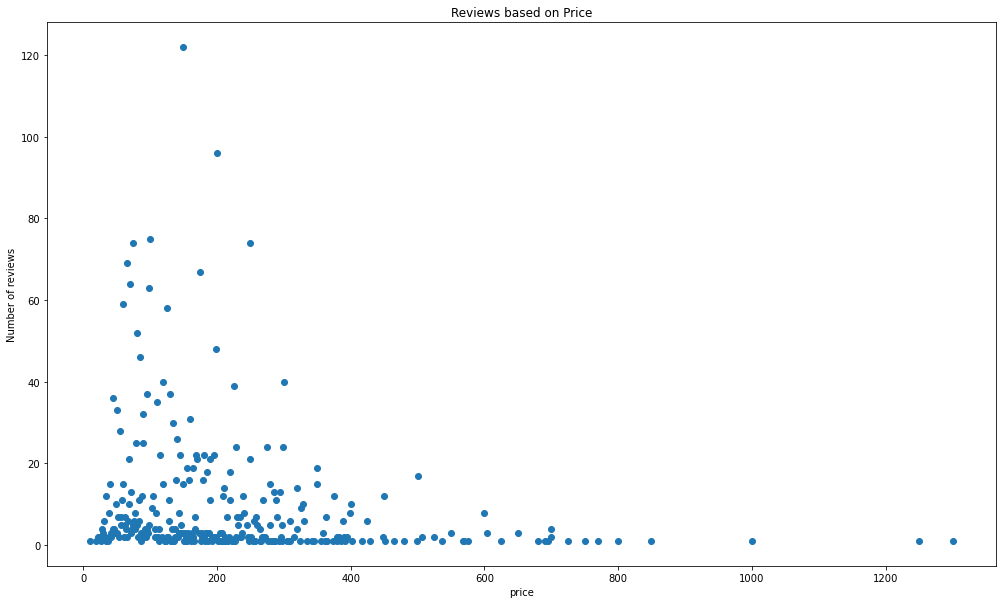

In [41]:
#Interpreting the relation between number of reviews and price

price_review = listings[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.groupby(['price'])['number_of_reviews'].count().plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

Text(0, 0.5, 'Number of reviews')

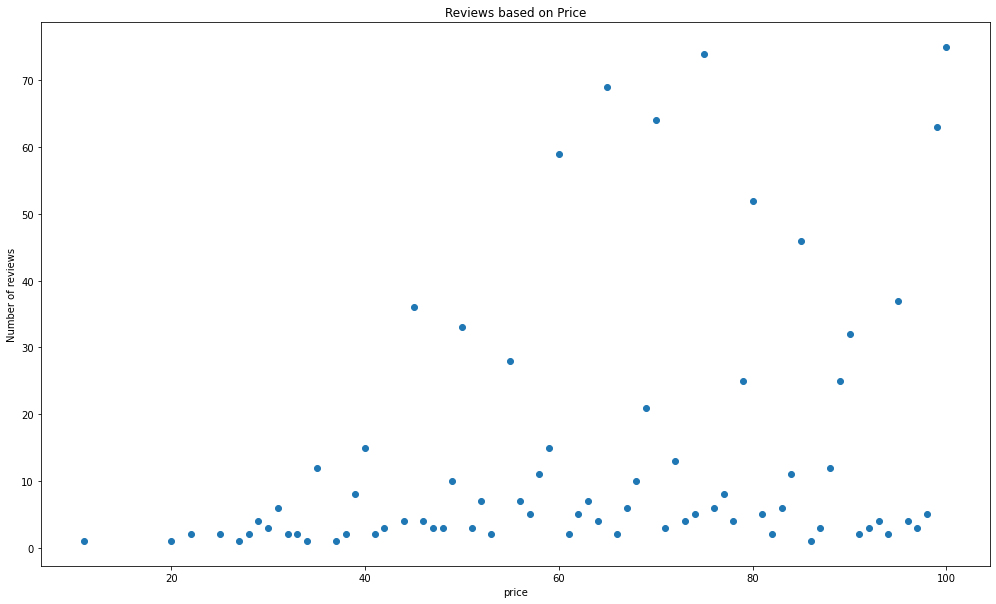

In [42]:
#Interpreting the relation between number of reviews and price

price_review = listings[['number_of_reviews', 'price']].sort_values(by = 'price')
price_review1 = price_review[price_review['price'] <= 100]

price_review1.groupby(['price'])['number_of_reviews'].count().plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

**This conclude, the price does not necessarly influence the reviews. Thus, the Price have no relation with the Number of reviews.**

This answers the question: Do users tend to give more reviews to expensive listings? 

The answer is no, even though we see the number of reviews is greater for houses with a price lower or equal 400. Those number of reviews are very random per listings.

### Analysing the relationship between the number of reviews and the review score

Text(0, 0.5, 'Number of reviews')

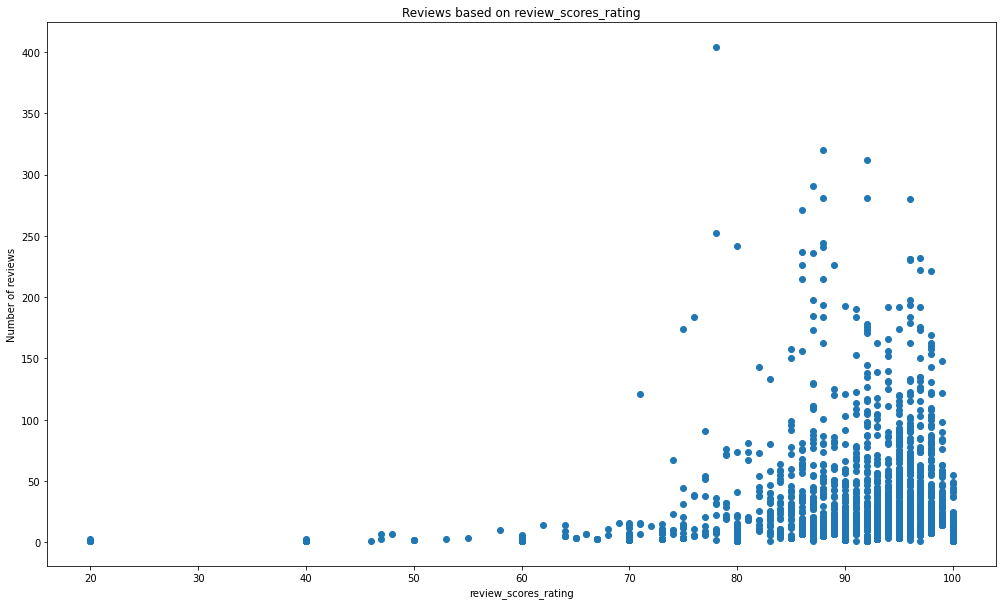

In [43]:
#Interpreting the relation between number of reviews and review_scores_rating 


price_review = listings[['number_of_reviews', 'review_scores_rating']].sort_values(by = 'review_scores_rating')

price_review.plot(x = 'review_scores_rating', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on review_scores_rating')

plt.xlabel("review_scores_rating")
plt.ylabel("Number of reviews")

The majority of our data pooint is on the second half of the graph with the reviews score between 70 and 100. We can't see any definilte relationship between the number of reviews and the review score.
Let's narrow down our view point to the review score between 70 to 100.

Text(0, 0.5, 'Number of reviews')

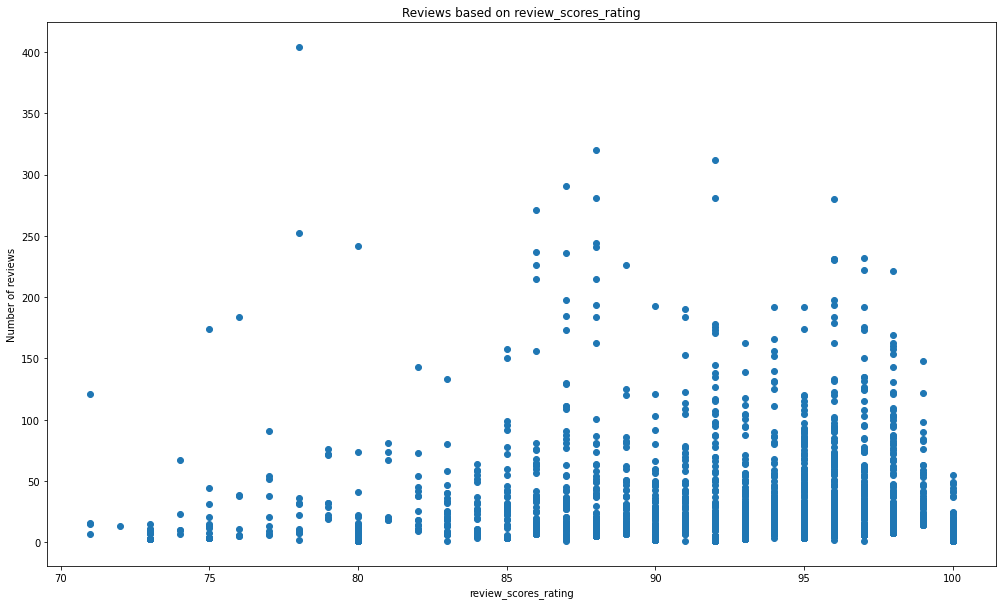

In [44]:
#Interpreting the relation between number of reviews and review_scores_rating 


price_review = listings[['number_of_reviews', 'review_scores_rating']].sort_values(by = 'review_scores_rating')
price_review1 = price_review[price_review['review_scores_rating'] >70 ]
price_review1.plot(x = 'review_scores_rating', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on review_scores_rating')

plt.xlabel("review_scores_rating")
plt.ylabel("Number of reviews")

There is no clear relation showing between these two values. Let's take a closer look by grouping the data by review scores.

Text(0, 0.5, 'Number of reviews')

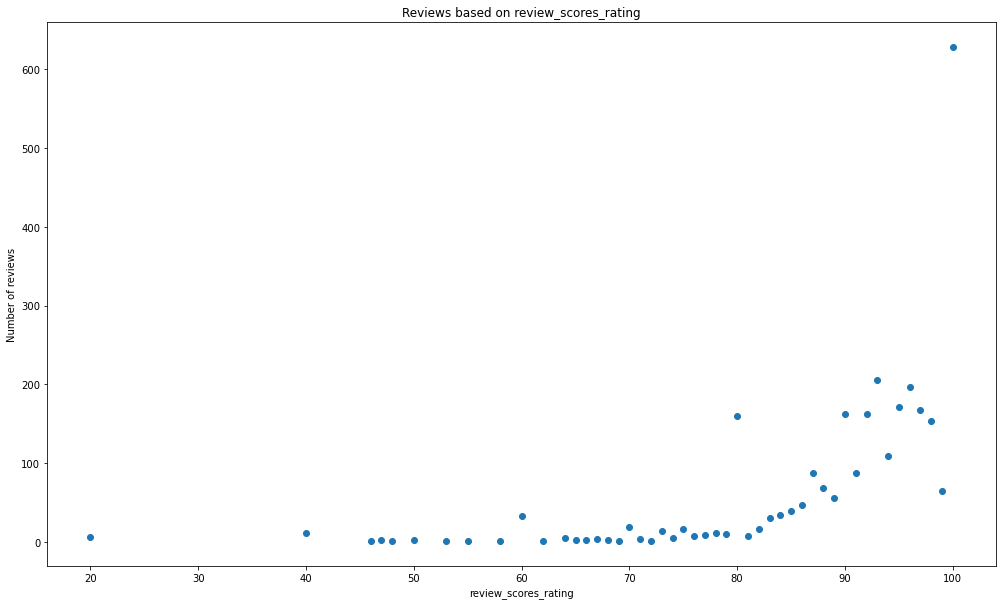

In [45]:
#Interpreting the relation between number of reviews and review_scores_rating 


price_review = listings[['number_of_reviews', 'review_scores_rating']].sort_values(by = 'review_scores_rating')

price_review.groupby(['review_scores_rating'])['number_of_reviews'].count().plot(x = 'review_scores_rating', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on review_scores_rating')

plt.xlabel("review_scores_rating")
plt.ylabel("Number of reviews")

Text(0, 0.5, 'Number of reviews')

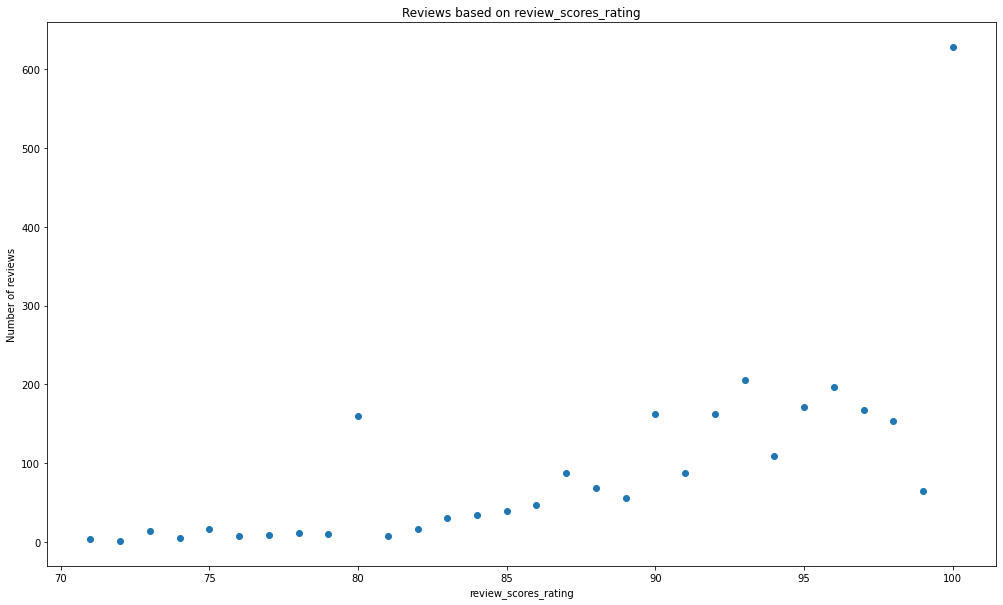

In [46]:
#Interpreting the relation between number of reviews and review_scores_rating 


price_review = listings[['number_of_reviews', 'review_scores_rating']].sort_values(by = 'review_scores_rating')
price_review1 = price_review[price_review['review_scores_rating'] >70 ]

price_review1.groupby(['review_scores_rating'])['number_of_reviews'].count().plot(x = 'review_scores_rating', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on review_scores_rating')

plt.xlabel("review_scores_rating")
plt.ylabel("Number of reviews")

Rating a listing because of the amount of previews ratings might be a thling among the users from time to time, but there is no clear relationship as showned on the multiple graph. Therefore, there is no relationship between the number of reviews and the review score.

This answers the question: Do users tend to rate a listing becsue it has multiple reviews in the past?

The answer is no, although it might happen in few instenses.

### Analysing the relationship between number of listilngs and the rating scores

Text(0, 0.5, 'host_listings_count')

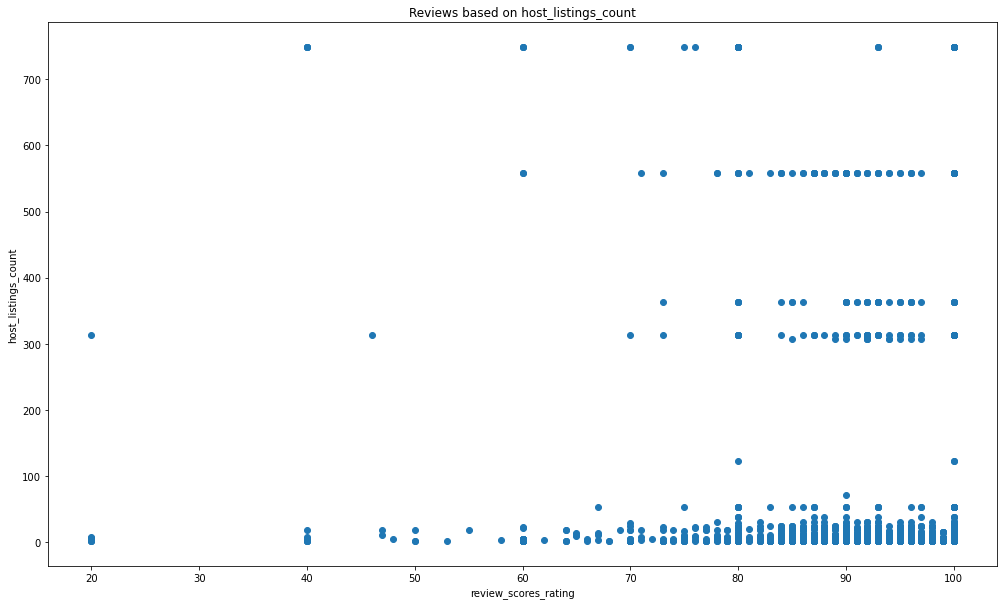

In [47]:
#Interpreting the relation between number of reviews and number of listings

price_review = listings[['host_listings_count', 'review_scores_rating']].sort_values(by = 'review_scores_rating')

price_review.plot(x = 'review_scores_rating', 
                  y = 'host_listings_count', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on host_listings_count')

plt.xlabel("review_scores_rating")
plt.ylabel("host_listings_count")

The majority of the data point are located between revieww scores 70 and 100. let's narrow down the graph to those values.

Text(0, 0.5, 'host_listings_count')

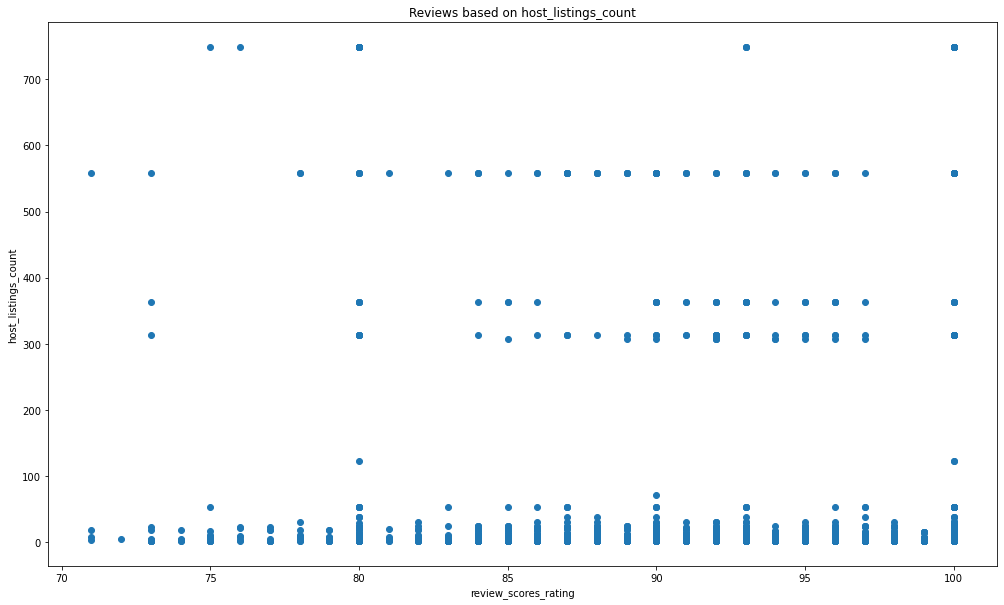

In [48]:
#Interpreting the relation between number of reviews and number of listings

price_review = listings[['host_listings_count', 'review_scores_rating']].sort_values(by = 'review_scores_rating')
price_review1 = price_review[price_review['review_scores_rating'] >70 ]

price_review1.plot(x = 'review_scores_rating', 
                  y = 'host_listings_count', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on host_listings_count')

plt.xlabel("review_scores_rating")
plt.ylabel("host_listings_count")

Once again, there is no clear relationship between the numbe of reviews and the review scores. 
Let's group the data by review score if we can have a better view.

Text(0, 0.5, 'host_listings_count')

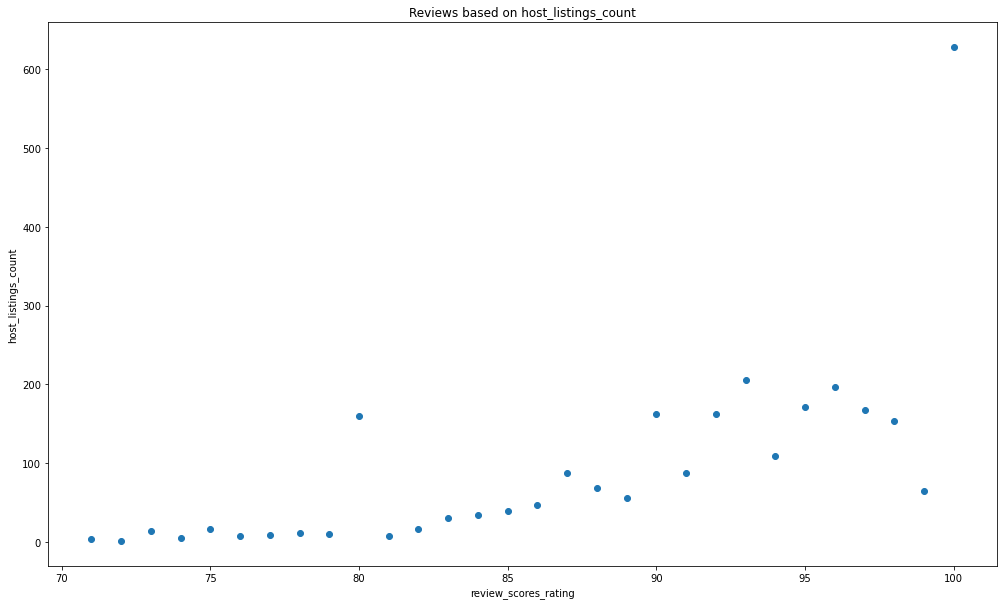

In [49]:
#Interpreting the relation between number of reviews and number of listings

price_review = listings[['host_listings_count', 'review_scores_rating']].sort_values(by = 'review_scores_rating')
price_review1 = price_review[price_review['review_scores_rating'] >70 ]

price_review1.groupby(['review_scores_rating'])['host_listings_count'].count().plot(x = 'review_scores_rating', 
                  y = 'host_listings_count', 
                  style = 'o',
                  figsize =(17,10),
                  legend = False,
                  title = 'Reviews based on host_listings_count')

plt.xlabel("review_scores_rating")
plt.ylabel("host_listings_count")

We can see the begin of a relationship between the two values, but we cannot conclude on a relationship as it is not consistent. There is no relationship between the number of listings and the review scores.

These answers the question: Is there a relation between the number of bookings of a place and the reviews score?  

The answer is no, even though on few occasion it is true. Overall it is not sustainable. Because a place has been listed multiple times does not mean it will always have a good rating.

### Let's see what type of listings are the most expensive or with the best rating.

Text(0, 0.5, 'nb bookings')

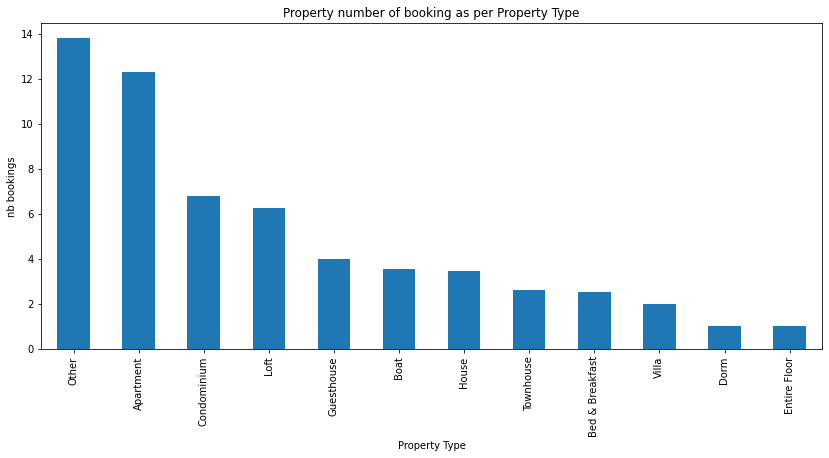

In [50]:
#What are the most and least booked property types in boston?

plt.figure(figsize=(14,6))
listings.groupby(['property_type'])['calculated_host_listings_count'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Property number of booking as per Property Type')
plt.xlabel('Property Type')
plt.ylabel('nb bookings')

Text(0, 0.5, 'nb bookings')

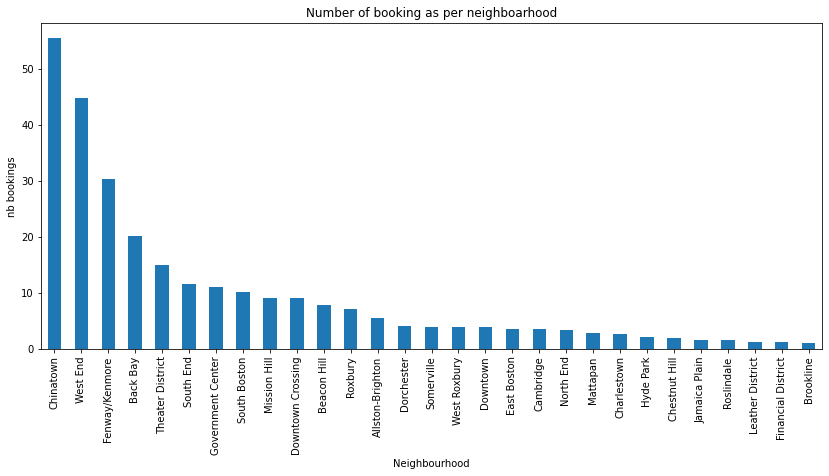

In [51]:
#Which neighborhoud has the most listings?

plt.figure(figsize=(14,6))
listings.groupby(['neighbourhood'])['calculated_host_listings_count'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of booking as per neighboarhood')
plt.xlabel('Neighbourhood')
plt.ylabel('nb bookings')

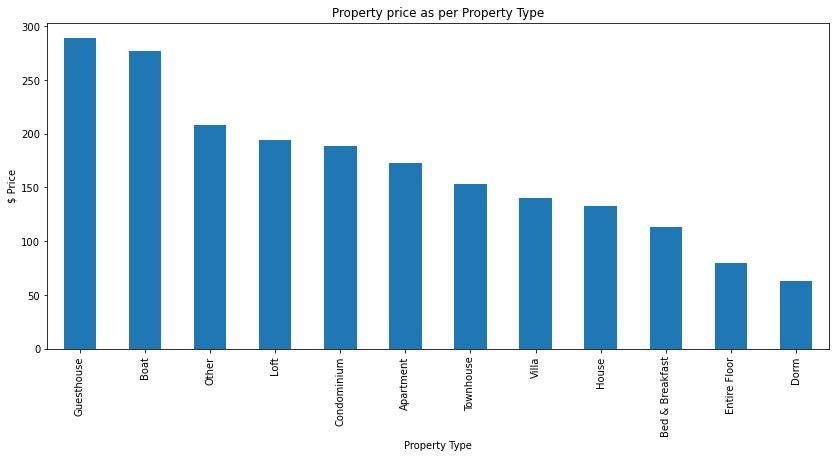

In [52]:
#What are some most expensive property types in boston

plt.figure(figsize=(14,6));
listings.groupby(['property_type'])['price'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Property price as per Property Type');
plt.xlabel('Property Type');
plt.ylabel('$ Price');

Text(0, 0.5, 'nb bookings')

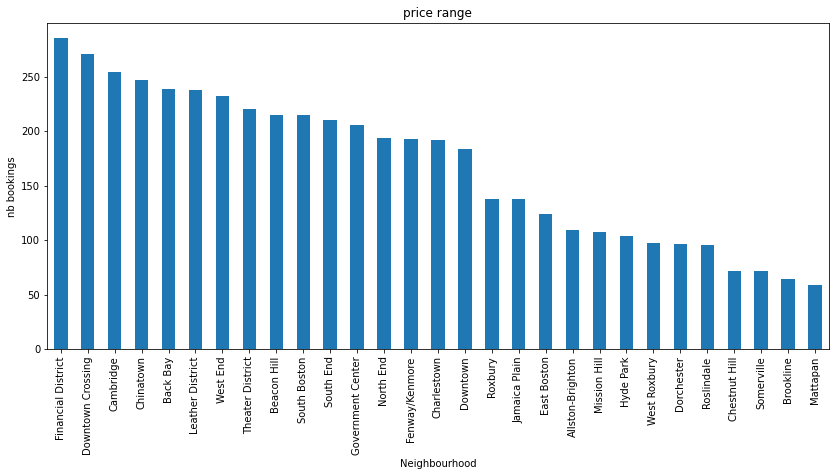

In [53]:
#What are the most and least expensive neighbourhoods in boston ?

plt.figure(figsize=(14,6))
listings.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('price range')
plt.xlabel('Neighbourhood')
plt.ylabel('nb bookings')

Text(0, 0.5, 'number_of_reviews')

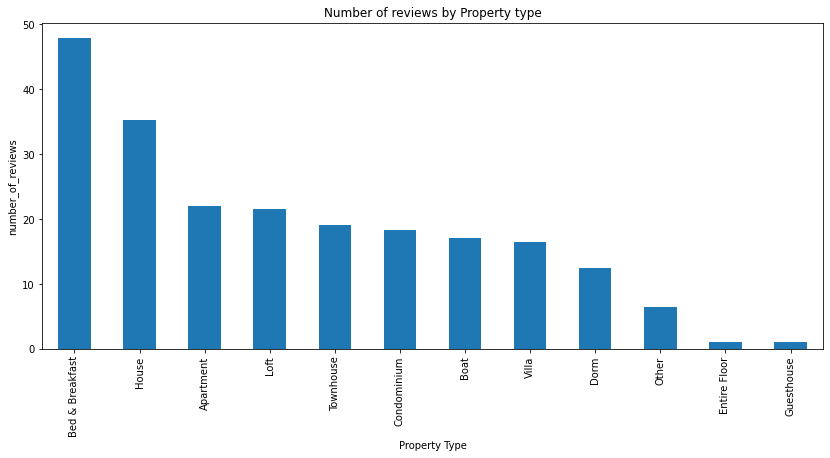

In [54]:
#What are some most rated property types in boston?

plt.figure(figsize=(14,6))
listings.groupby(['property_type'])['number_of_reviews'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of reviews by Property type')
plt.xlabel('Property Type')
plt.ylabel('number_of_reviews')

Text(0, 0.5, 'review_scores_rating')

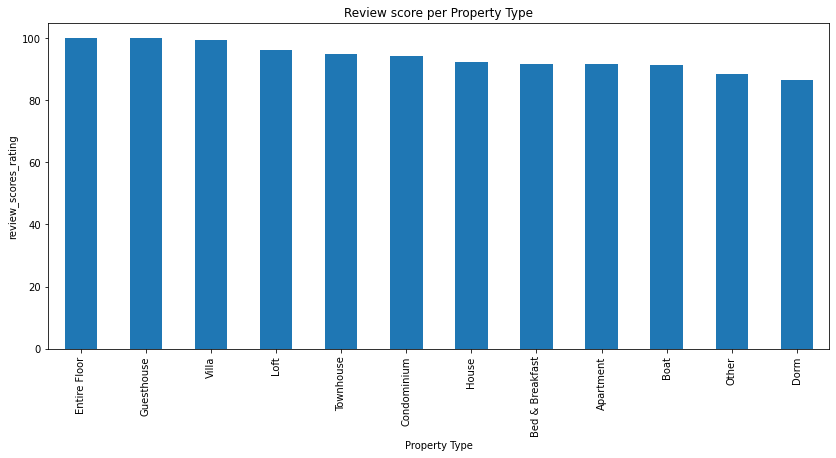

In [55]:
#What are some best ratings property types in boston?

plt.figure(figsize=(14,6))
listings.groupby(['property_type'])['review_scores_rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Review score per Property Type')
plt.xlabel('Property Type')
plt.ylabel('review_scores_rating')

Text(0, 0.5, 'review_scores_rating')

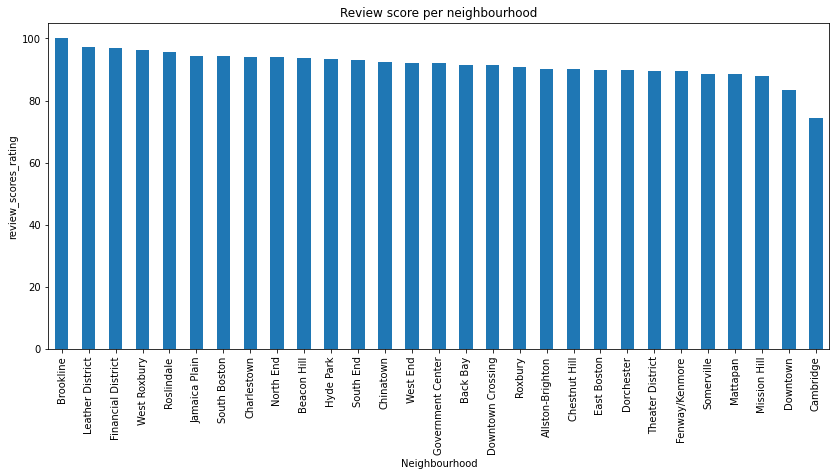

In [56]:
#Which neighborhoud has the best ratings?

plt.figure(figsize=(14,6))
listings.groupby(['neighbourhood'])['review_scores_rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Review score per neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('review_scores_rating')

By comparing the ratings on the plots we did. We can notice there is not a lot of variation. All the ratings are hight from 80 to 100. 
Is this due to a bias on the customer side while rating?
So customer rank hlight every property no mater the price and condition of the property?
Those questions go beyond the scope of our analysis. In order to have a clear view on the rankings, we need to applied sentiment analysis methods to the comments on the properties.

### Let's analyse the reviews per year and moths to see when users are most likely to give reviews

In [57]:
# grouping the reviews by year
reviews_per_year = pd.DataFrame(reviews.groupby(['year'])['listing_id'].count())

In [58]:
# adapting the indexing
reviews_per_year.rename(columns = {'listing_id': 'listing_count'}, inplace = True)
reviews_per_year.reset_index(inplace=True)

In [59]:
# overview of the output
reviews_per_year.head(20)

,year,listing_count
0,2009,20
1,2010,200
2,2011,664
3,2012,1316
4,2013,2965
5,2014,9272
6,2015,23814
7,2016,30024


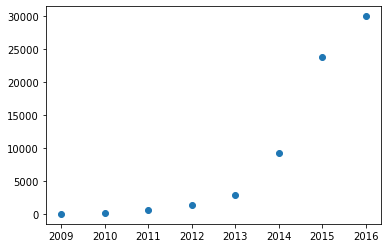

In [60]:
# ploting the number of reviews against the year
fig, ax = plt.subplots()
plt.scatter(reviews_per_year['year'], reviews_per_year['listing_count'])
plt.show()

We cna see in the plot above the number of reviews has increased a lot since 2009 and 1016.
Let's see below how the number of reviews increased throughout the months.

In [61]:
reviews_per_yearmonth = pd.DataFrame(reviews.groupby(['yearmonth'])['listing_id'].count())

In [62]:
reviews_per_yearmonth.rename(columns = {'listing_id': 'listing_count'}, inplace = True)
reviews_per_yearmonth.reset_index(inplace=True)

In [63]:
reviews_per_yearmonth['yearmonth'] = reviews_per_yearmonth['yearmonth'].astype(str)

In [64]:
reviews_per_yearmonth.head(20)

,yearmonth,listing_count
0,2009-03,1
1,2009-04,1
2,2009-05,1
3,2009-07,1
4,2009-08,2
5,2009-09,3
6,2009-10,6
7,2009-11,3
8,2009-12,2
9,2010-01,2


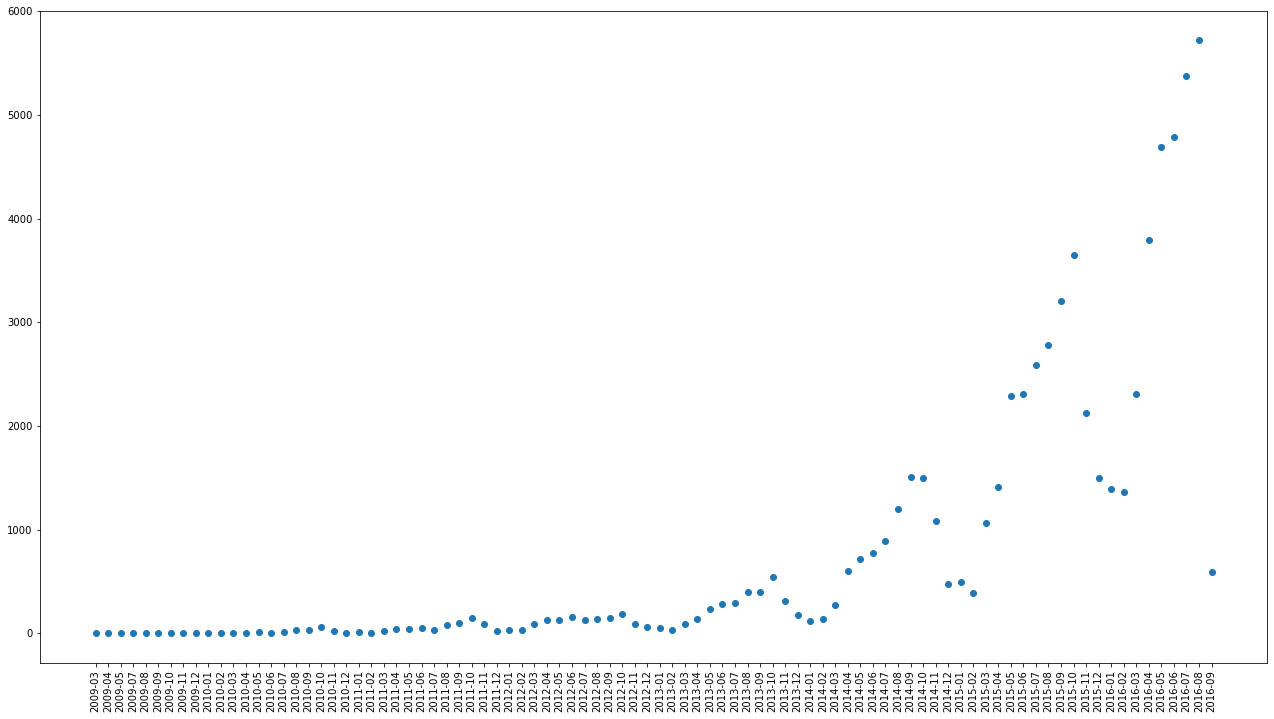

In [65]:
# plotting the number of reviews per monthYear

fig, ax = plt.subplots(figsize=(22, 12))
plt.scatter(reviews_per_yearmonth['yearmonth'], reviews_per_yearmonth['listing_count'])
plt.xticks(rotation=90)
plt.show()

As seen previewsly, the number of reviews has increased alot through the years. But when you look closer we can see that for each month of a given year there is a pick. Where the number of reviews id the highest. 
Let's see more clearl this trend.

In [66]:
#Splitting the yearmonth columns to get separe colums for years and months

reviews_per_yearmonth_pivot = reviews_per_yearmonth.copy()
reviews_per_yearmonth_pivot[['yearmonth','month']] = reviews_per_yearmonth_pivot['yearmonth'].str.split('-',expand=True)

In [67]:
reviews_per_yearmonth_pivot.head()

,yearmonth,listing_count,month
0,2009,1,03
1,2009,1,04
2,2009,1,05
3,2009,1,07
4,2009,2,08


In [68]:
#Transforming the data to a matrice shape for easier plotting.

# Months columns prefilled
months_in_order = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [69]:
reviews_per_yearmonth_pivot = reviews_per_yearmonth_pivot[reviews_per_yearmonth_pivot['yearmonth']>"2008"].pivot(index='month', columns='yearmonth', values='listing_count').reindex(months_in_order)

In [70]:
reviews_per_yearmonth_pivot

yearmonth,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,
01,NaN,2.0,17.0,31.0,54.0,124.0,500.0,1391.0
02,NaN,3.0,7.0,31.0,35.0,135.0,391.0,1362.0
03,1.0,3.0,20.0,93.0,91.0,273.0,1062.0,2310.0
04,1.0,2.0,39.0,126.0,141.0,600.0,1410.0,3797.0
05,1.0,11.0,44.0,132.0,232.0,713.0,2291.0,4691.0
06,NaN,8.0,56.0,157.0,283.0,775.0,2307.0,4783.0
07,1.0,13.0,37.0,133.0,295.0,890.0,2587.0,5377.0
08,2.0,31.0,78.0,134.0,395.0,1203.0,2783.0,5719.0
09,3.0,37.0,102.0,145.0,396.0,1504.0,3204.0,594.0


In [71]:
reviews_per_yearmonth_pivot.columns

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], dtype='object', name='yearmonth')

From a first glance, the pick of the number of reviews happens each year on the 10th month and around. We still need to plot the data for better clarity. There is few null values in 2009 and 2016 columns. The 2009 columns still fit our analysis since the all month from the 7th below are well filled. The 2016 column on the contrary is mnissing some usefull data, we will remove that column.

In [72]:
#fill the null values in the 2009 column with mean
reviews_per_yearmonth_pivot['2009'] = reviews_per_yearmonth_pivot['2009'].fillna(value=round(reviews_per_yearmonth_pivot['2009'].mean()))

In [73]:
#removing the 2016 column
reviews_per_yearmonth_pivot = reviews_per_yearmonth_pivot.drop('2016', 1)

C:\Users\Dilimou\AppData\Local\Temp/ipykernel_23132/1733786286.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  reviews_per_yearmonth_pivot = reviews_per_yearmonth_pivot.drop('2016', 1)


In [74]:
reviews_per_yearmonth_pivot

yearmonth,2009,2010,2011,2012,2013,2014,2015
month,,,,,,,
01,2.0,2.0,17.0,31.0,54.0,124.0,500.0
02,2.0,3.0,7.0,31.0,35.0,135.0,391.0
03,1.0,3.0,20.0,93.0,91.0,273.0,1062.0
04,1.0,2.0,39.0,126.0,141.0,600.0,1410.0
05,1.0,11.0,44.0,132.0,232.0,713.0,2291.0
06,2.0,8.0,56.0,157.0,283.0,775.0,2307.0
07,1.0,13.0,37.0,133.0,295.0,890.0,2587.0
08,2.0,31.0,78.0,134.0,395.0,1203.0,2783.0
09,3.0,37.0,102.0,145.0,396.0,1504.0,3204.0


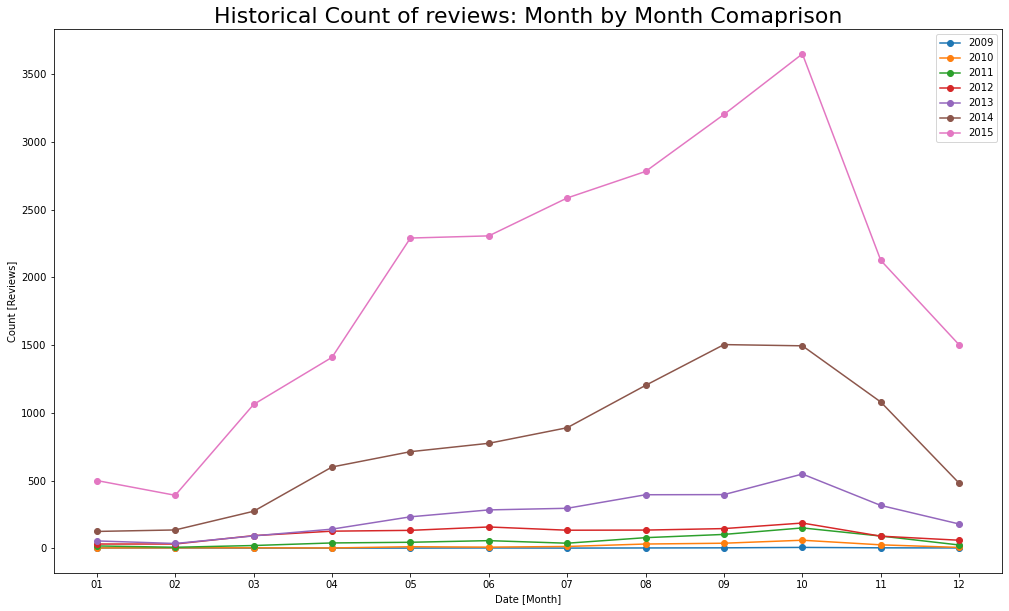

In [75]:
#line chart

fig, ax = plt.subplots(figsize=(17, 10))
plt.plot(reviews_per_yearmonth_pivot, marker='o')
plt.title("Historical Count of reviews: Month by Month Comaprison", fontsize=22)
plt.xlabel("Date [Month]")
plt.ylabel("Count [Reviews]")
plt.legend(reviews_per_yearmonth_pivot.columns)
plt.show()

From the above plot, we can conclude that each year the reviews reach a pick level on the 10th month except for 2014 where the pick was reached on the 9th month.
Overall, customers tend to give more reviews during around 9th to 10th month.
This could be explained by the fact that people will be returning back to their life therefore more property will be giving back to their owner thus people will post their reviews a lot.